Corruption data from: https://www.transparency.org/

In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
c2009= pd.read_csv('../data/corruption_perception_2009.csv', sep = "\s*,\s*")

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_38478/4273260562.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  c2009= pd.read_csv('../data/corruption_perception_2009.csv', sep = "\s*,\s*")


In [ ]:
c2009['year'] = '2009'

In [15]:
c2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   180 non-null    object 
 1   iso       180 non-null    object 
 2   region    180 non-null    object 
 3   score     180 non-null    float64
 4   rank      180 non-null    int64  
 5   interval  180 non-null    object 
 6   year      180 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.0+ KB


In [6]:
happy_df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")

/var/folders/m_/n8mjr4pn3vl8nz5my8xxr76r0000gn/T/ipykernel_38478/3190235487.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  happy_df= pd.read_csv('../data/DataForTable2.1WHR2023.txt', sep = "\s*,\s*")


In [10]:
happy_df.columns = happy_df.columns.str.replace(' ','_')
happy_df.columns = happy_df.columns.str.lower()
happy_df.columns

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')

In [11]:
list_countries = happy_df.country_name.unique()

ValueError: min() arg is an empty sequence

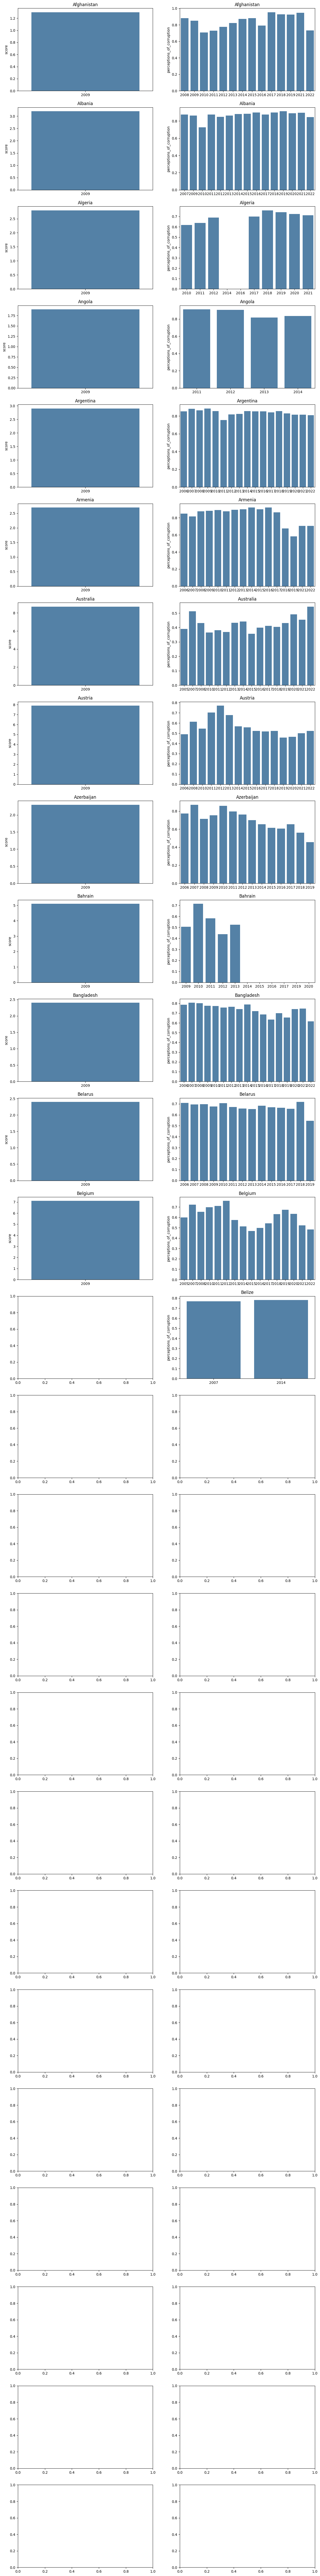

In [16]:
fig,axes = plt.subplots(26,2, figsize =(15,130))
count = 0
for item in list_countries:
    sns.barplot(data = happy_df[happy_df['country_name'] == item],
                 x = 'year', y = 'perceptions_of_corruption', 
                 ax=axes[int(count)][1], color='steelblue').set(title=item, xlabel='')
    sns.barplot(data = c2009[c2009['country'] == item],
                 x = 'year', y = 'score', 
                 ax=axes[int(count)][0], color='steelblue').set(title=item, xlabel='')
    count += 1